### This is just a notebook to easily get you going with some operations using ORBc  

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import data, filters, transform, color, exposure
from skimage.feature import orb, match_descriptors, plot_matches, corner_harris, corner_orientations, corner_peaks, corner_fast

In [10]:
def prepare(im : np.ndarray):
    return filters.gaussian(color.rgb2gray(im), sigma=0.5)


In [11]:
# Setup and prepare the image to work on
input_img = data.camera()
img = prepare(input_img)


In [12]:
# Setup of image to feature match with
img_rotated = transform.warp(
    img,
    transform.AffineTransform(
        scale=(1.3, 1.1), 
        rotation=0.5,
        translation=(0, -200))
)

s:\github\scikit-image\skimage\feature\orb.py:165: FutureWarning: Until the version 0.16, threshold_rel was set to 0.1 by default.Starting from version 0.16, the default value is set to None.Until version 0.18, a None value corresponds to a threshold value of 0.1.The default behavior will match skimage.feature.peak_local_max.
  keypoints = corner_peaks(fast_response, min_distance=1)


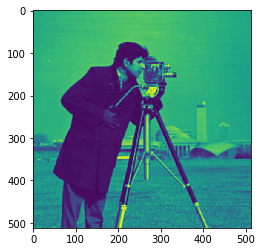

In [13]:
# Create feature detectors/extractors (ORB), obtain features and match them against each other.

detectorA = orb.ORB()
detectorB = orb.ORB()


detectorA.detect_and_extract(img)
detectorB.detect_and_extract(img_rotated)

matches = match_descriptors(detectorA.descriptors, detectorB.descriptors)

plt.imshow(img)
plt.show()


## `_detect_octave`

S:\Users\halvo\Anaconda3\envs\learning-openCV\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Until the version 0.16, threshold_rel was set to 0.1 by default.Starting from version 0.16, the default value is set to None.Until version 0.18, a None value corresponds to a threshold value of 0.1.The default behavior will match skimage.feature.peak_local_max.
  


(1257,)
(900,)
(637,)
(472,)
(356,)
(261,)
(209,)
(170,)
done


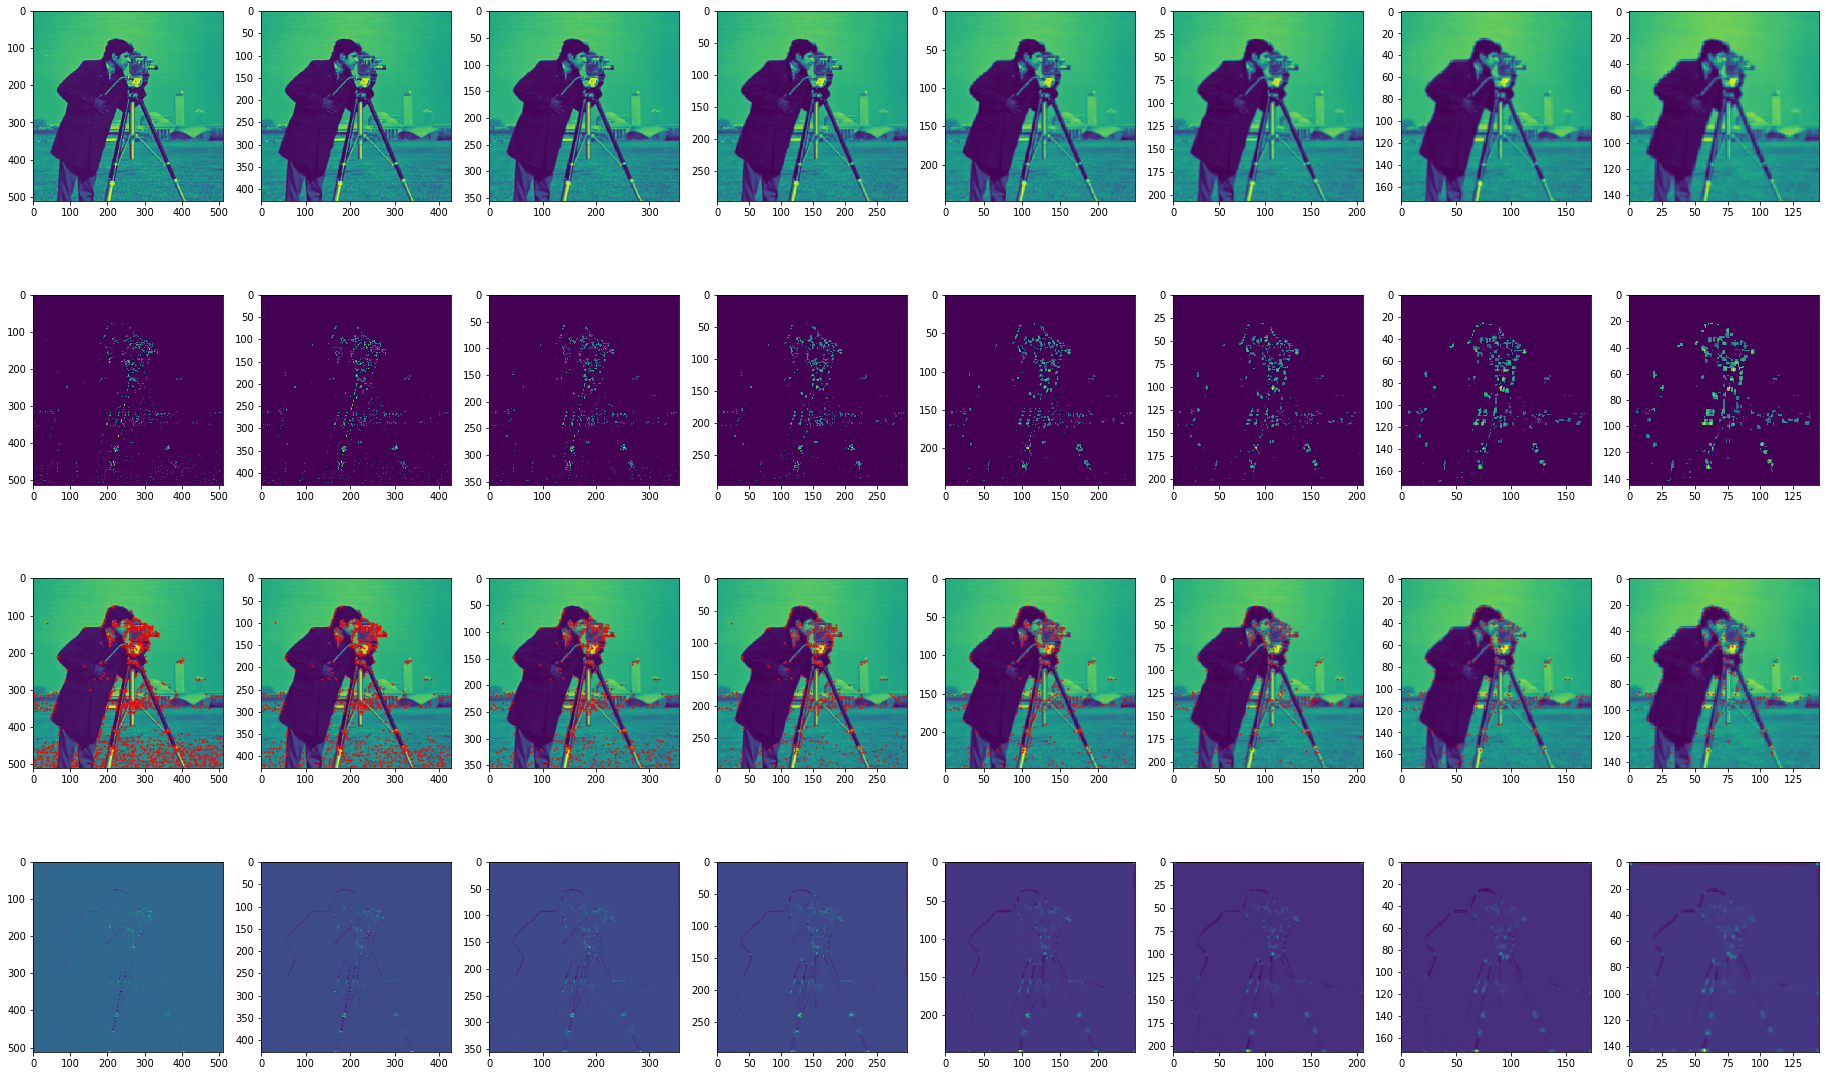

In [14]:
OFAST_MASK = np.zeros((31, 31))
def imshow(plot: plt.axis, octave):
    plot[0].imshow(octave)  # Original
    fast_response = corner_fast(octave, 9, 0.08)
    plot[1].imshow(fast_response)
    keypoints = corner_peaks(fast_response, min_distance=1)
    # print(keypoints)
    plot[2].imshow(octave)
    plot[2].scatter(keypoints[:,1], keypoints[:,0], c='red', s=1)

    orientations = corner_orientations(octave, keypoints,
                                           OFAST_MASK)
    # print(orientations)
    
    harris_response = corner_harris(octave, method='k', k=0.04)
    plot[3].imshow(harris_response)
    responses = harris_response[keypoints[:, 0], keypoints[:, 1]]
    print(responses.shape)

pyramid = detectorA._build_pyramid(img)

fig, axes = plt.subplots(4, len(pyramid), figsize=(32,20))
for i, octave in enumerate(pyramid):
    
    imshow(axes[:,i], octave)
    # 
    # axes[0, i].imshow(corner_fast(pyramid, 9, 0.08), cmap="gray")
    # axes[1, i].imshow(corner_fast(pyramid[i+4], 9, 0.08), cmap="gray")

plt.show()
print("done")

S:\Users\halvo\Anaconda3\envs\learning-openCV\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Until the version 0.16, threshold_rel was set to 0.1 by default.Starting from version 0.16, the default value is set to None.Until version 0.18, a None value corresponds to a threshold value of 0.1.The default behavior will match skimage.feature.peak_local_max.
  """


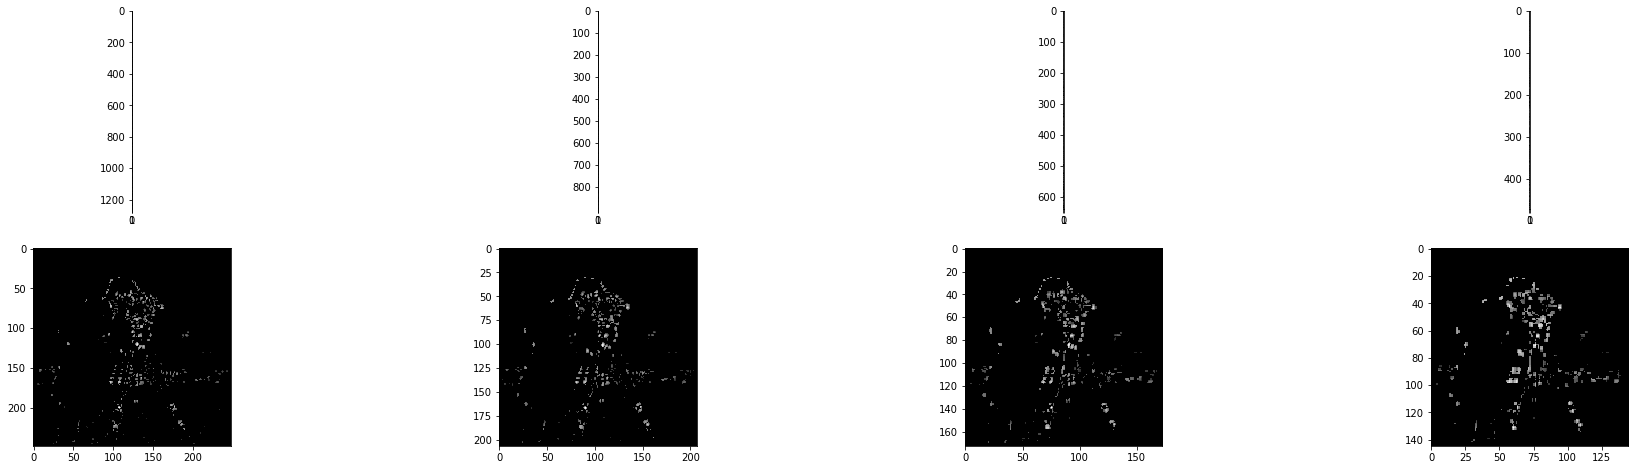

In [15]:
pyramid = detectorA._build_pyramid(img)

fig, axes = plt.subplots(2, 4, figsize=(32,8))
for i in range(4):
    axes[0, i].imshow(corner_peaks(corner_fast(pyramid[i], 9, 0.08), min_distance=1), cmap="gray")
    axes[1, i].imshow(corner_fast(pyramid[i+4], 9, 0.08), cmap="gray")

plt.show()

In [16]:
multichannel_pyramid = detectorA.build_pyramid_multichannel(img)


# Determine octaves from scales
octaves = (np.log(detectorA.scales) / np.log(detectorA.downscale)).astype(np.intp)
print(octaves)
fig, axes = plt.subplots(1, len(multichannel_pyramid), figsize=(32,128))
for i, octave in enumerate(multichannel_pyramid):
    axes[i].imshow(octave)

plt.show()
    

AttributeError: 'ORB' object has no attribute 'build_pyramid_multichannel'

In [ ]:
# Plot the images and matches

# fig, axes = plt.subplots(1, 1)
# 
# plot_matches(axes, img, img_rotated, detectorA.keypoints, detectorB.keypoints, matches)
# 
# plt.show()